In [28]:
import pandas as pd
import itertools
import math
import matplotlib.pyplot as plt
import random
import seaborn

In [29]:
number_rows = 1000

In [30]:
country_dataset = pd.read_csv("../Datasets/top_200_password_2020_by_country_extended.csv")

In [31]:
common_words = pd.read_csv("unigram_freq.csv", nrows = number_rows)

In [32]:
list_of_bad_words = []

for i in common_words.index:
    if(len(str(common_words['name'][i])) <= 1):
        list_of_bad_words.append(i)


In [33]:
common_words = common_words.drop(list_of_bad_words)

In [34]:
country_dataset['Data Length'] = country_dataset['Password'].str.len()

In [35]:
L = country_dataset['Data Length']
N = 127 #number of symbols that can be typed (ascii table)

country_dataset['strength'] = L*(math.log(N))/math.log(2)

In [36]:
country_dataset.sort_values(by=['Data Length'])
country_dataset.dropna()

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,length,unique_chars,numbers,symbols,symbols_and_numbers,sequentials,Data Length,strength
0,cn,China,1,123456,8159358,< 1 second,1.0,0,6,6,6,0,6,0,6,41.932108
1,cn,China,2,123456789,1817250,< 1 second,2.0,0,9,9,9,0,9,0,9,62.898162
2,cn,China,3,12345678,700019,< 1 second,6.0,0,8,8,8,0,8,0,8,55.909477
3,cn,China,4,654321,245827,< 1 second,23.0,0,6,6,6,0,6,0,6,41.932108
4,cn,China,5,1234567890,210168,< 1 second,9.0,0,10,10,10,0,10,0,10,69.886847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,vn,Vietnam,196,hongngoc,2660,3 Hours,0.0,10800,8,5,0,0,0,0,8,55.909477
996,vn,Vietnam,197,anhtien,2628,17 Minutes,0.0,1020,7,6,0,0,0,0,7,48.920793
997,vn,Vietnam,198,lanhuong,2620,3 Hours,0.0,10800,8,7,0,0,0,0,8,55.909477
998,vn,Vietnam,199,congacon,2584,2 Hours,0.0,7200,8,5,0,0,0,0,8,55.909477


In [37]:
common_words

,name,count
0,the,23135851162
1,of,13151942776
2,and,12997637966
3,to,12136980858
5,in,8469404971
...,...,...
995,japan,81110725
996,doing,80821946
997,loans,80821333
998,shoes,80755612


In [40]:
#Calculate the list of matches with the most common words
list_of_matches = []

for i in country_dataset.index:
    match = ""
    for j in common_words.index:
        if(str(common_words['name'][j]) in str(country_dataset['Password'][i])):
            match += str(common_words['name'][j]) + ","
    
    list_of_matches.append(match[:-1])
            

In [41]:
list_of_matches

['',
 '',
 '',
 '',
 '',
 'in',
 'or,as,password,word',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'an',
 'we',
 'up,per',
 'as',
 'cd',
 '',
 '',
 '',
 'an,de',
 'as',
 '',
 'as,we',
 'we',
 'as,we',
 '',
 'we',
 '',
 '',
 '',
 'we',
 'an,any',
 '',
 '',
 '',
 '',
 'is,his',
 'as',
 'on,ca',
 'de,cd',
 'in',
 'co',
 'id',
 'an',
 'an',
 'an',
 'we',
 'in',
 '',
 'in',
 '',
 '',
 '',
 '',
 'you,love',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'an',
 'do',
 '',
 '',
 '',
 '',
 '',
 '',
 'de,cd',
 '',
 '',
 'on,ca',
 '',
 '',
 '',
 'as,was',
 '',
 '',
 'we',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'we',
 '',
 '',
 '',
 '',
 'an',
 '',
 'in,sun',
 '',
 '',
 '',
 '',
 'la',
 'as,was',
 '',
 'jun',
 'day,go,good',
 'de,even,en',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'de',
 'we',
 '',
 '',
 '',
 '',
 'go,good',
 '',
 '',
 '',
 '',
 '',
 'in',
 'in',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'an,up,per,man',
 '',


In [43]:
country_dataset['matches'] = list_of_matches

In [44]:
country_dataset

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,length,unique_chars,numbers,symbols,symbols_and_numbers,sequentials,Data Length,strength,matches
0,cn,China,1,123456,8159358,< 1 second,1.0,0,6,6,6,0,6,0,6,41.932108,
1,cn,China,2,123456789,1817250,< 1 second,2.0,0,9,9,9,0,9,0,9,62.898162,
2,cn,China,3,12345678,700019,< 1 second,6.0,0,8,8,8,0,8,0,8,55.909477,
3,cn,China,4,654321,245827,< 1 second,23.0,0,6,6,6,0,6,0,6,41.932108,
4,cn,China,5,1234567890,210168,< 1 second,9.0,0,10,10,10,0,10,0,10,69.886847,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,vn,Vietnam,196,hongngoc,2660,3 Hours,0.0,10800,8,5,0,0,0,0,8,55.909477,"on,go"
996,vn,Vietnam,197,anhtien,2628,17 Minutes,0.0,1020,7,6,0,0,0,0,7,48.920793,"an,en"
997,vn,Vietnam,198,lanhuong,2620,3 Hours,0.0,10800,8,7,0,0,0,0,8,55.909477,"on,an,la"
998,vn,Vietnam,199,congacon,2584,2 Hours,0.0,7200,8,5,0,0,0,0,8,55.909477,"on,co"


In [51]:
list_of_new_strengths = []

for i in country_dataset.index:
    list_of_new_strengths.append(country_dataset['strength'][i] - len(country_dataset['matches'][i]))

In [52]:
country_dataset['new strengths'] = list_of_new_strengths

In [53]:
country_dataset

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,length,unique_chars,numbers,symbols,symbols_and_numbers,sequentials,Data Length,strength,matches,new strengths
0,cn,China,1,123456,8159358,< 1 second,1.0,0,6,6,6,0,6,0,6,41.932108,,41.932108
1,cn,China,2,123456789,1817250,< 1 second,2.0,0,9,9,9,0,9,0,9,62.898162,,62.898162
2,cn,China,3,12345678,700019,< 1 second,6.0,0,8,8,8,0,8,0,8,55.909477,,55.909477
3,cn,China,4,654321,245827,< 1 second,23.0,0,6,6,6,0,6,0,6,41.932108,,41.932108
4,cn,China,5,1234567890,210168,< 1 second,9.0,0,10,10,10,0,10,0,10,69.886847,,69.886847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,vn,Vietnam,196,hongngoc,2660,3 Hours,0.0,10800,8,5,0,0,0,0,8,50.909477,"on,go",45.909477
996,vn,Vietnam,197,anhtien,2628,17 Minutes,0.0,1020,7,6,0,0,0,0,7,43.920793,"an,en",38.920793
997,vn,Vietnam,198,lanhuong,2620,3 Hours,0.0,10800,8,7,0,0,0,0,8,47.909477,"on,an,la",39.909477
998,vn,Vietnam,199,congacon,2584,2 Hours,0.0,7200,8,5,0,0,0,0,8,50.909477,"on,co",45.909477


(array([  5.,   1.,   7.,  13.,  12.,  10.,  39.,  32.,  46., 111., 161.,
         47.,  12.,  78.,  66.,  43.,  79.,  60.,  25.,   9.,  23.,  42.,
          6.,  13.,  34.,   1.,   2.,   3.,   4.,   1.,   1.,   6.,   0.,
          0.,   4.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.]),
 array([ 20.96605406,  22.94618139,  24.92630872,  26.90643604,
         28.88656337,  30.8666907 ,  32.84681803,  34.82694536,
         36.80707268,  38.78720001,  40.76732734,  42.74745467,
         44.727582  ,  46.70770932,  48.68783665,  50.66796398,
         52.64809131,  54.62821863,  56.60834596,  58.58847329,
         60.56860062,  62.54872795,  64.52885527,  66.5089826 ,
         68.48910993,  70.46923726,  72.44936459,  74.42949191,
         76.40961924,  78.38974657,  80.3698739 ,  82.35000123,
         84.33012855,  86.31025588,  88.29038321,  90.27051054,
         92.25

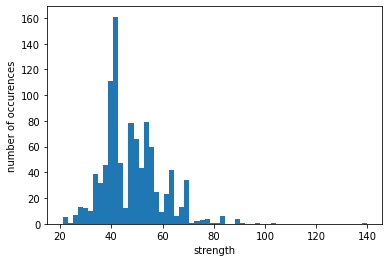

In [54]:
plt.xlabel('strength')
plt.ylabel('number of occurences')

plt.hist(country_dataset['strength'], bins=60)

In [ ]:
china_strengths = []
russia_strengths = []
spain_strengths = []
us_strengths = []
vietnam_strengths = []

for i in country_dataset.index:
    if(country_dataset['country'][i] == "China"):
        china_strengths.append(country_dataset['new strengths'][i])
    
    if(country_dataset['country'][i] == "Russia"):
        russia_strengths.append(country_dataset['new strengths'][i])
        
    if(country_dataset['country'][i] == "Spain"):
        spain_strengths.append(country_dataset['new strength'][i])
        
    if(country_dataset['country'][i] == "United States"):
        us_strengths.append(country_dataset['strength'][i])
    
    if(country_dataset['country'][i] == "Vietnam"):
        vietnam_strengths.append(country_dataset['strength'][i])